# Modelos predictivos

In [1]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
train = pd.read_excel('train.xlsx') 

In [3]:
y = train.PRODUCTO_1
X = train.drop('PRODUCTO_1', axis=1)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Ahora entrenamos todos los modelos que queramos variando hiperparámetros y se guardan sus scores. Los hiperparámetros que mejores scores den se usan para reentrenar el modelo con el dataset entero, medir el tiempo de ejecución y guardarlo

In [14]:
metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500, 1000]:
    for max_depth in [2, 3, 5, 7, 10]:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=73)
        rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

        metrics[f'rf_{n_estimators}_{max_depth}'] = {
            'RMSE_1': rmse_scores[0],
            'RMSE_2': rmse_scores[1],
            'RMSE_3': rmse_scores[2],
            'RMSE_4': rmse_scores[3],
            'RMSE_5': rmse_scores[4],
            'MEAN_RMSE': rmse_scores.mean()
        }

metrics_rf = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_rf.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
rf_500_3,225.184304,262.377970,321.569337,346.217636,253.836963,281.837242
rf_500_10,226.187245,263.245937,320.192933,346.321699,253.999331,281.989429
rf_500_5,226.235920,262.727778,320.333255,345.790813,255.520140,282.121581
rf_500_7,226.223884,263.386807,319.862839,346.616570,254.531472,282.124315
rf_1000_3,226.603976,262.734379,321.826268,345.056907,256.037359,282.451778
rf_500_2,226.620172,261.109919,322.726006,346.386032,255.663046,282.501035
rf_1000_2,227.518253,261.158163,322.962567,345.585063,255.943335,282.633476
rf_1000_7,227.087047,263.588160,321.068876,345.465292,256.101789,282.662233
rf_1000_10,227.161061,263.619459,321.268224,345.483074,256.103925,282.727149
rf_1000_5,227.566942,263.286963,321.666425,344.783789,256.816299,282.824084


Guardamos esta tablita

In [15]:
metrics_rf.to_csv('../06_model_output/metrics/random_forest.csv')

Reentrenamos el modelo con todos los datos, lo guardamos, y guardamos el RMSE que obtenemos sobre el propio train y el tiempo de computación

In [4]:
time1 = time.time()
rf = RandomForestRegressor(n_estimators=500, max_depth=3, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = rf.predict(X)
rmse = root_mean_squared_error(y, preds)
rmse

225.55590624304355

In [5]:
dump(rf, '../06_model_output/models/random_forest.joblib')

['../06_model_output/models/random_forest.joblib']

In [6]:
with open('../06_model_output/metrics/final_metrics.txt', 'a') as f:
    f.write(f'\nRF, {time2}, {rmse}')

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [16]:
metrics = {}
for max_depth in [2, 3, 4, 5, 7, 10, 15, 20, 25]:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=73)
    rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

    metrics[f'dt_{max_depth}'] = {
        'RMSE_1': rmse_scores[0],
        'RMSE_2': rmse_scores[1],
        'RMSE_3': rmse_scores[2],
        'RMSE_4': rmse_scores[3],
        'RMSE_5': rmse_scores[4],
        'MEAN_RMSE': rmse_scores.mean()
    }

metrics_dt = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_dt.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
dt_2,232.291257,303.757097,338.096907,335.224829,269.997327,295.873483
dt_7,234.187785,312.252828,338.096907,353.475143,253.225372,298.247607
dt_10,234.187785,312.252828,338.096907,353.475143,253.225372,298.247607
dt_15,234.187785,312.252828,338.096907,353.475143,253.225372,298.247607
dt_20,234.187785,312.252828,338.096907,353.475143,253.225372,298.247607
dt_25,234.187785,312.252828,338.096907,353.475143,253.225372,298.247607
dt_3,244.516008,311.014754,338.096907,339.947161,270.472687,300.809503
dt_4,239.063756,304.515882,338.096907,361.206356,301.702366,308.917053
dt_5,231.334270,311.899149,338.096907,420.456200,341.735521,328.704409


In [17]:
metrics_dt.to_csv('../06_model_output/metrics/decision_tree.csv')

In [21]:
time1 = time.time()
dt = DecisionTreeRegressor(max_depth=2, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = dt.predict(X)
rmse = root_mean_squared_error(y, preds)
rmse

272.60670728972127

In [22]:
dump(dt, '../06_model_output/models/decision_tree.joblib')

['../06_model_output/models/decision_tree.joblib']

In [23]:
with open('../06_model_output/metrics/final_metrics.txt', 'a') as f:
    f.write(f'\nDT, {time2}, {rmse}')

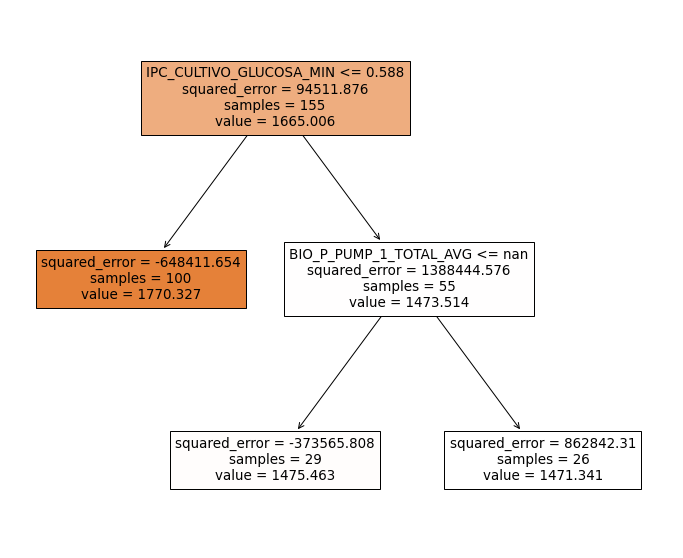

In [31]:
plt.figure(figsize=(12,10))
plot_tree(dt, feature_names=X.columns, filled=True);

## Gradient Boosting

In [36]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [39]:
metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500]:
    for max_depth in [2, 3, 5, 7]:
        for eta in [0.05, 0.1, 0.2, 0.5]:
            model = HistGradientBoostingRegressor(max_iter=n_estimators, max_depth=max_depth, learning_rate=eta, random_state=73)
            rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

            metrics[f'gb_{n_estimators}_{max_depth}_{eta}'] = {
                'RMSE_1': rmse_scores[0],
                'RMSE_2': rmse_scores[1],
                'RMSE_3': rmse_scores[2],
                'RMSE_4': rmse_scores[3],
                'RMSE_5': rmse_scores[4],
                'MEAN_RMSE': rmse_scores.mean()
            }

metrics_gb = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_gb.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
gb_5_2_0.2,212.045881,248.048260,318.778855,340.496842,232.136023,270.301172
gb_10_3_0.1,216.087500,240.689358,319.250822,343.474588,235.189850,270.938424
gb_25_7_0.05,212.033291,243.139262,330.175977,340.033792,238.537393,272.783943
gb_25_5_0.05,212.033291,243.139262,330.175977,340.033792,238.537393,272.783943
gb_25_3_0.05,215.236874,242.472432,325.463441,340.153314,241.153625,272.895937
...,...,...,...,...,...,...
gb_100_5_0.5,253.729472,266.147402,418.697467,409.809926,265.375912,322.752036
gb_250_5_0.5,254.534174,266.202890,418.948070,409.822762,265.409462,322.983472
gb_250_7_0.5,254.534174,266.202890,418.948070,409.822762,265.409462,322.983472
gb_500_5_0.5,254.549534,266.209207,418.963640,409.822786,265.417334,322.992500


In [40]:
metrics_gb.to_csv('../06_model_output/metrics/gradient_boost.csv')

In [41]:
time1 = time.time()
gb = HistGradientBoostingRegressor(max_iter=5, max_depth=2, learning_rate=0.2, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = gb.predict(X)
rmse = root_mean_squared_error(y, preds)
rmse

231.2168645987376

In [42]:
dump(gb, '../06_model_output/models/gradient_boost.joblib')

['../06_model_output/models/gradient_boost.joblib']

In [43]:
with open('../06_model_output/metrics/final_metrics.txt', 'a') as f:
    f.write(f'\nGB, {time2}, {rmse}')

## XGBoost

In [44]:
from xgboost import XGBRegressor

In [45]:
metrics = {}
for n_estimators in [5, 10, 25, 50, 100, 250, 500]:
    for max_depth in [2, 3, 5, 7]:
        for eta in [0.05, 0.1, 0.2, 0.5]:
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=eta)
            rmse_scores = - cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')

            metrics[f'xgb_{n_estimators}_{max_depth}_{eta}'] = {
                'RMSE_1': rmse_scores[0],
                'RMSE_2': rmse_scores[1],
                'RMSE_3': rmse_scores[2],
                'RMSE_4': rmse_scores[3],
                'RMSE_5': rmse_scores[4],
                'MEAN_RMSE': rmse_scores.mean()
            }

metrics_xgb = pd.DataFrame.from_dict(metrics, orient='index',columns=['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4', 'RMSE_5', 'MEAN_RMSE'])
metrics_xgb.sort_values(by='MEAN_RMSE')

,RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,MEAN_RMSE
xgb_100_3_0.05,310.840705,247.969883,342.288646,344.989531,251.689279,299.555609
xgb_250_3_0.05,303.683147,241.285723,352.587159,349.214252,252.225133,299.799083
xgb_500_3_0.05,304.381126,241.003405,352.433221,349.066740,253.481104,300.073119
xgb_100_2_0.05,318.447987,242.687359,338.795884,351.888434,250.349489,300.433831
xgb_50_2_0.1,307.619924,250.748358,344.007798,364.317683,237.935903,300.925933
...,...,...,...,...,...,...
xgb_10_5_0.05,1203.469879,1132.924116,939.205285,1082.410456,1020.373948,1075.676737
xgb_5_2_0.05,1443.336662,1403.142145,1226.656226,1362.159497,1278.348678,1342.728642
xgb_5_3_0.05,1453.727795,1404.093248,1225.439830,1359.646715,1283.933845,1345.368287
xgb_5_7_0.05,1456.734591,1404.093248,1225.245753,1359.646715,1284.892487,1346.122559


In [46]:
metrics_xgb.to_csv('../06_model_output/metrics/xgboost.csv')

In [48]:
time1 = time.time()
xgb = XGBRegressor(n_estimators=250, max_depth=3, learning_rate=0.05, random_state=73).fit(X, y)
time2 = time.time() - time1
preds = xgb.predict(X)
rmse = root_mean_squared_error(y, preds)
rmse

20.201994945143035

In [49]:
dump(xgb, '../06_model_output/models/xgboost.joblib')

['../06_model_output/models/xgboost.joblib']

In [50]:
with open('../06_model_output/metrics/final_metrics.txt', 'a') as f:
    f.write(f'\nXGB, {time2}, {rmse}')